In [ ]:
%%capture
import matplotlib as mpl
import matplotlib.font_manager as fm

!wget https://github.com/openmaptiles/fonts/raw/master/open-sans/OpenSans-Light.ttf
fm.fontManager.ttflist += fm.createFontList(['OpenSans-Light.ttf'])

import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
rcParams['font.size'] = 35
rc('font', family='sans-serif') 
rcParams['font.family'] = 'Open Sans'
rcParams['font.weight'] = 'light'
rcParams['mathtext.fontset'] = 'cm'

import numpy as np
from google.colab import files

colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']


sigma(L2) 0.9999999999999991
sigma(mu2) -1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in double_scalars


Optimal rate: 
sigma(L2) 1.0
sigma(mu2) -1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in double_scalars


Optimal rate: 
sigma(L2) 0.9999999999999964
sigma(mu2) -1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in double_scalars


Optimal rate: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

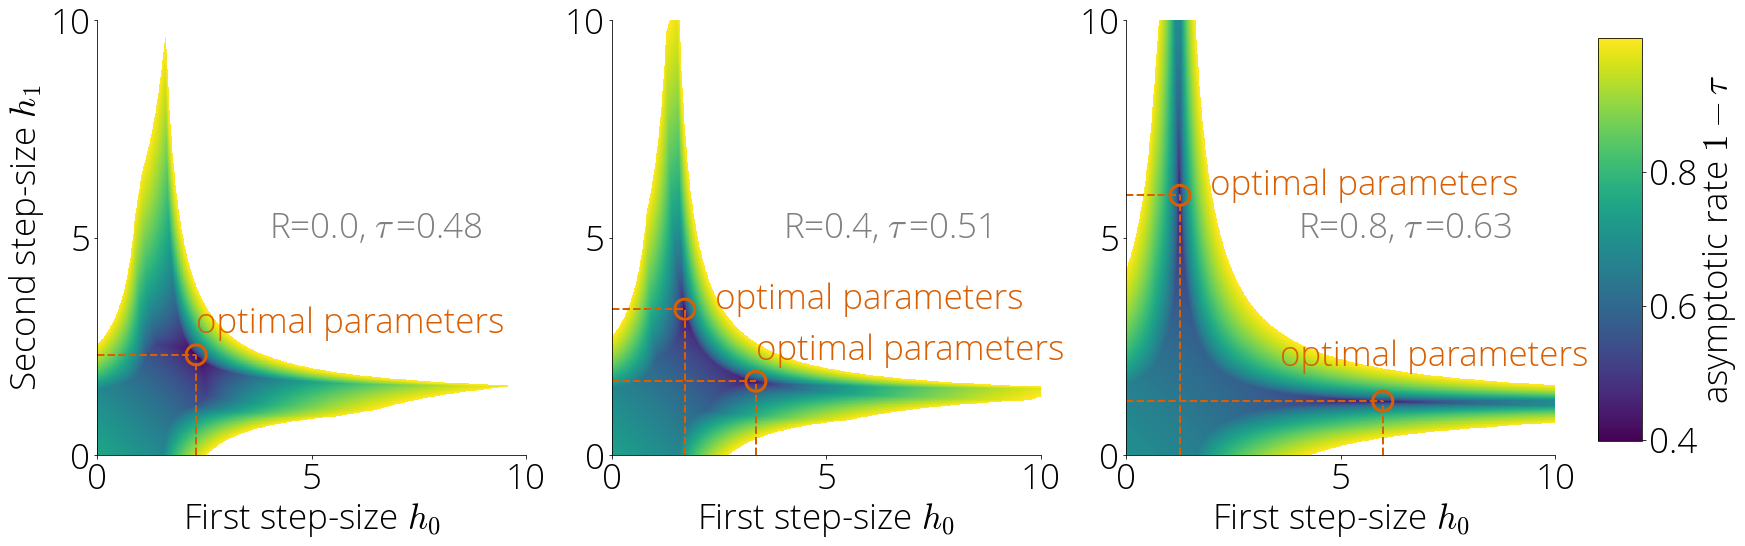

In [ ]:
# just an example, can be changed
mu1 = 0.1
L2 = 1.

fig, axarr = plt.subplots(1, 3, figsize=(3 * 10, 1 * 8))

for it, R in enumerate([0.0, 0.2, 0.4]):


  L1 = (mu1 + L2)/2 - (L2 - mu1) * R
  mu2 = (mu1 + L2)/2 + (L2 - mu1) * R

  rho = (L2 + mu1) / (L2 - mu1)
  R = (mu2 - L1) / (L2 - mu1)

  h_max = 10

  n_grid = 1000
  optimal_m = (
      (np.sqrt(rho ** 2 - R ** 2) - np.sqrt(rho ** 2 - 1)) / \
      np.sqrt(1 - R**2)) ** 2
  all_h2 = np.linspace(0, h_max, n_grid)
  all_h1 = np.linspace(0, h_max, n_grid)
  h1_grid, h2_grid = np.meshgrid(all_h1, all_h2)

  optimal_h1 = (1 + optimal_m) / L1
  optimal_h2 = (1 + optimal_m) / mu2

  def sigma(x, m, h1, h2):
    return 2 *( (1 + m - h1 * x) / (2 * np.sqrt(m))) * ((1 + m - h2 * x) / (2 * np.sqrt(m))) - 1


  def varphi(xi):
    return xi + np.sqrt(xi**2 - 1)

  print("sigma(L2)", sigma(L2, optimal_m, optimal_h1, optimal_h2))
  print("sigma(mu2)", sigma(mu2, optimal_m, optimal_h1, optimal_h2))


  rate = np.zeros((n_grid, n_grid))

  for i in range(n_grid):
    for j in range(n_grid):
      h1, h2 = h1_grid[i, j] / L2, h2_grid[i, j]/L2
      s1 = np.abs(sigma(mu1, optimal_m, h1, h2))
      s2 = np.abs(sigma(L1, optimal_m, h1, h2))
      s3 = np.abs(sigma(mu2, optimal_m, h1, h2))
      s4 = np.abs(sigma(L2, optimal_m, h1, h2))

      smax = np.sqrt(max(s1, s2, s3, s4))

      tmp = (h1 + h2) / (2 * h1 * h2)
      # if the minimum of the parabola is in the support set
      if (mu1 < tmp < L1) or (mu2 < tmp < L2):
        smax = max(smax, np.sqrt(np.abs(sigma(tmp, optimal_m, h1, h2))))

      if np.abs(smax) <= 1:
        rate[i, j] = np.sqrt(optimal_m)
      else:
        tmp = np.sqrt(optimal_m) * np.sqrt(varphi(smax))
        if tmp <= 1:
          rate[i, j] = tmp
        else:
          rate[i, j] = np.NaN

  pc = axarr[it].pcolor(h1_grid, h2_grid, rate, rasterized=True, cmap='viridis')
  axarr[it].set_xticks((0, 5, 10))

  axarr[it].set_yticks((0, 5, 10))
  axarr[it].set_xlabel(r"First step-size $h_0$")
  axarr[it].text(4, 5, r"R=%.1f, $\tau\,$=%.2f" % (R, 1 - np.sqrt(optimal_m)), color='grey')
  axarr[it].spines['top'].set_visible(False)
  axarr[it].spines['right'].set_visible(False)
  axarr[it].scatter(optimal_h1, optimal_h2, s=400, facecolors='none', edgecolors='#d95f02', lw=3)
  axarr[it].plot(np.linspace(0, optimal_h1, 100), optimal_h2 * np.ones(100), '--', c='#d95f02', lw=2)
  axarr[it].plot(np.linspace(optimal_h1, optimal_h1, 100), np.linspace(0, optimal_h2, 100), '--', c='#d95f02', lw=2)
  if it > 0:
    axarr[it].text(optimal_h2 + 0.5, optimal_h1, " optimal parameters", c='#d95f02')
  if it ==2:
    axarr[it].text(0.6 * optimal_h1, optimal_h2 + 0.8, "optimal parameters", c='#d95f02')
  else:
    axarr[it].text(optimal_h1, optimal_h2 + 0.5, "optimal parameters", c='#d95f02')

  if it > 0:
    axarr[it].scatter(optimal_h2, optimal_h1, s=400, facecolors='none', edgecolors='#d95f02', lw=3)
    axarr[it].plot(np.linspace(0, optimal_h2, 100), optimal_h1 * np.ones(100), '--', c='#d95f02', lw=2)
    axarr[it].plot(np.linspace(optimal_h2, optimal_h2, 100), np.linspace(0, optimal_h1, 100), '--', c='#d95f02', lw=2)

  axarr[it].set_xlim((0, None))
  axarr[it].set_ylim((0, None))

axarr[0].set_ylabel("Second step-size $h_1$")



# add space for colour bar
fig.subplots_adjust(right=0.80)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
fig.colorbar(pc,  cax=cbar_ax)
cbar_ax.set_ylabel(r'asymptotic rate $1 - \tau$')

#plt.tight_layout()
f_path = 'rate_convergence_momentum.pdf'
plt.savefig(f_path, transparent=True, dpi=100, bbox_inches='tight')
files.download(f_path)
plt.show()
